# Static Data Visualization in Python

:::{admonition} Lesson Content
:class: note, dropdown

- contextualizing plotting
- `matplotlib` `plt.plot()` method
- `matplotlib` subplots
- closing concepts

:::

## Read in Datasets

1. WAS 2020 Data
2. Subset of an AVIRIS image

In [1]:
# import pandas as pd
import rasterio  # change to xarray. Maybe keep rasterio for their future reference (?)

In [2]:
# # Import example WAS data
# was_2020_filepath = "./data/SARP 2020 final.xlsx"
# was_2020 = pd.read_excel(was_2020_filepath, "INPUT", skipfooter=7)

In [2]:
# Import example AVIRIS data
with rasterio.open('./data/subset_f180628t01p00r02_corr_v1k1_img') as src:
    metadata = src.meta
    bands = src.read()

## Contextualizing Plotting

### Reasons to plot things

* view your data for a sanity check
* answer a science question (often iterative)
* create final plots for publication

### Quick Plot Examples

Both data groups have seen an example of quick plots.  This is important in confirming that your data contains what you think it contains.

#### Tabular data

<AxesSubplot:xlabel='i-Pentane (E/B)', ylabel='n-Pentane (E/B)'>

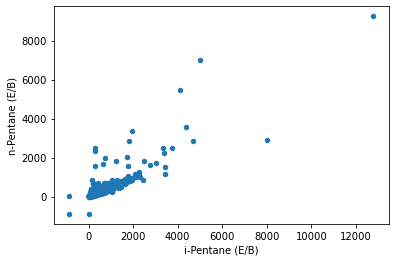

In [4]:
was_2020.plot.scatter(x='i-Pentane (E/B)', y='n-Pentane (E/B)')

#### Raster data

In [5]:
import matplotlib.pyplot as plt

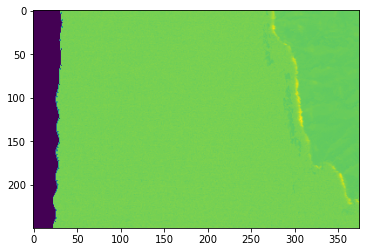

In [6]:
plt.imshow(bands[4])

### Key Concept: Ease vs. Complexity

![Ease vs Complexity](./images/ease_vs_complexity.jpg)

## The Classic `matplotlib`

### `matplotlib` Object Hierarchy

Plots in Matplotlib or organized as a collection of overlapping objects.  Each object can be independently accessed.

A few of the most important objects to start with are **figure**, **axes** and **axis**.

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png">

Figure and axes look redundant when you have a single dataset to show, but if you start adding multiple axes into a figure the distinction becomes more clear.

It isn't always clear that the plot holds independent objects because lots of functions in matplotlib create several objects at once.  But know that under the hood each part of a plot is its own entity.

### Method 1: Using `plt.plot()`

The `plt.plot()` method is convenient because we it does several things for you at once.  The downside is that it only works for creating one figure at a time.

#### Step 1: Organize our data
For our example let's make a spectral plot for a pixel of our AVIRIS image.

In [7]:
import numpy as np

In [8]:
y = bands[:, 100, 150]  # z profile
x = np.arange(1, 225)  # band number

#### Step 2: Make our graph

In [9]:
import matplotlib.pyplot as plt

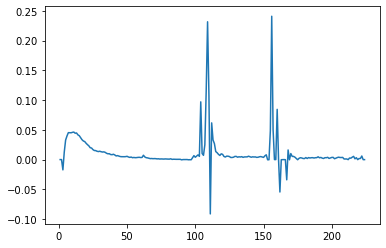

In [10]:
plt.plot(x,y)

Even though we didn't create a figure, axes, axis, line, axis labels, or tick marks they were all created together with `plt.plot()`.  If we want to change something about any of those elements or add elements that don't exist right now we do that by using methods on the `plt` object.

Text(0, 0.5, 'reflectance')

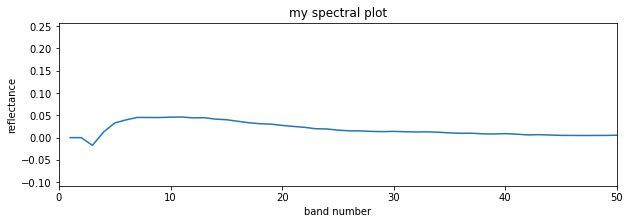

In [13]:
plt.plot(x, y)
plt.xlim(0, 50)  # changing the existing x axis scale
plt.title('my spectral plot')  # adding a title
plt.xlabel('band number')   # adding a label on the x axis
plt.ylabel('reflectance')  # adding a label on the y axis

In [12]:
plt.rcParams["figure.figsize"] = (10,3)

There are several ways to customize your figure which are captured in the [`plt.plot()` docs page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

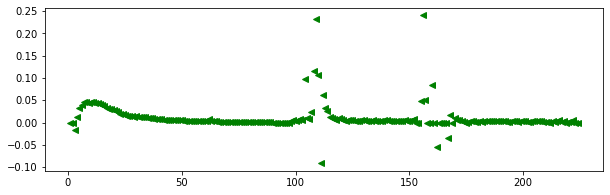

In [14]:
plt.plot(x, y, 'g<')

In addition to `plt.plot()` there are a dozen or so other types of plots you can make that operate in the same way as `plt.plot()`.  A list of all the options is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

If you are looking to modify a specific part of your graph use the "Anatomy of a figure" image to figure out the vocabulary for the change you'd like to make.

<img src='https://files.realpython.com/media/anatomy.7d033ebbfbc8.png'>

_Image from the [matplotlib usage guide](https://matplotlib.org/stable/tutorials/introductory/usage.html#figure-parts)_

### More types of plots
In addition to `plt.plot()` there are a dozen or so other types of plots you can make that operate in the same way as `plt.plot()`.  A list of all the options is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

#### Example: scatter plot

Text(0.5, 1.0, 'Pentane relationship')

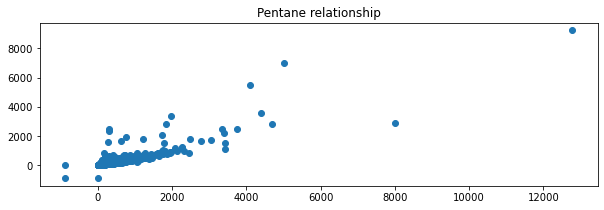

In [15]:
plt.scatter(was_2020['i-Pentane (E/B)'], was_2020['n-Pentane (E/B)'])
plt.title('Pentane relationship')

#### Example: histogram

Text(0.5, 0, 'Carbon Monoxide (ppbv)')

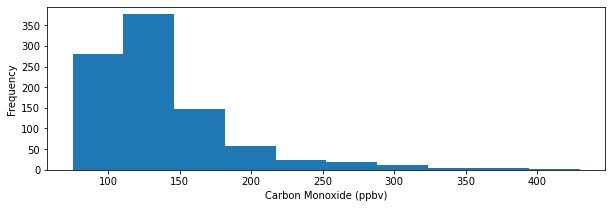

In [16]:
plt.hist(was_2020['CO (ppbv)'])
plt.ylabel('Frequency')
plt.xlabel('Carbon Monoxide (ppbv)')

### Method 2: Accessing the `figure` with `plt.subplots()`

Use for: multiple lines, basemaps, subplots.


(<Figure size 720x216 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

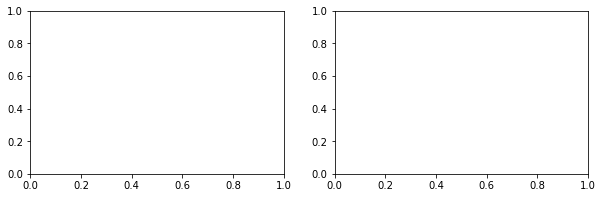

In [17]:
plt.subplots(1, 2)

With subplots we will assign our figure and each axis to a variable and change aspects of our diagram by specifically referencing either the figure or the relevant axes.

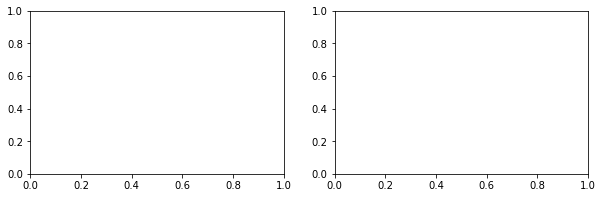

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)

Text(0.5, 1.0, 'spectral plot')

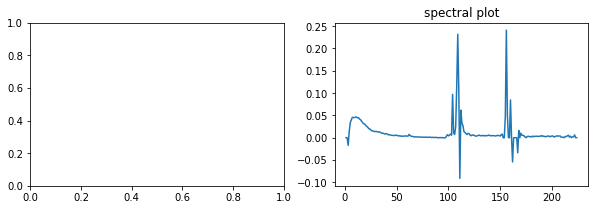

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.plot(x, y)
ax2.set_title('spectral plot')

Text(0.5, 1.0, 'Pentane Ratio')

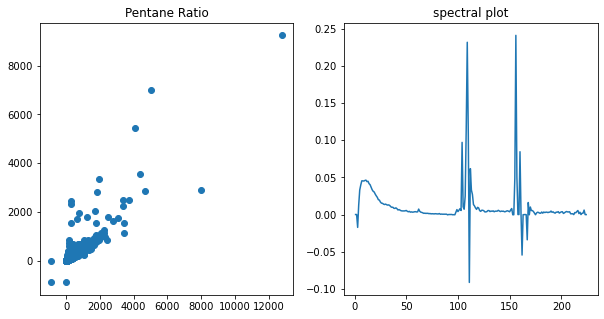

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax2.plot(x, y)
ax2.set_title('spectral plot')
ax1.scatter(x=was_2020['i-Pentane (E/B)'], y=was_2020['n-Pentane (E/B)'])
ax1.set_title('Pentane Ratio')

### Group practice - figure with multiple lines

## Closing concepts

### Concept 1: Building on top of `matplotlib`

You may not need the specific control that `matplotlib` gives in which case you may choose to use another library. Because `matplotlib` is the old standby of the Python plotting world you are often still using `matplotlib`.  This is described by saying that a given plotting function, such as `pandas` is **built on top of** `matplotlib`.

#### An analogy with legos

![Lego Libraries 1](./images/building_on_libraries-legos.jpg)

#### Translating to Python

![Building on Libraries 2](./images/building_on_libraries-python.jpg)

## Concept 2: Static vs. Interactive Visualization

**static visualization** is creating a visual that creates a singel image.  You might choose to make many images and flash them together to take a move, but in the end you can view the output from a single perspective (the one you defined when creating the image.  Historically, `matplotlib` is a library for static images although it does have some interactive elements.

**interactive visualization** (also thought of as web visualization) are visuals that are created that you can click on or move around.  You can zoom or hover over a point to see its value.  `bokeh` is a library for interactive visualization.

### Interactive viz example
<img src="http://www.pybloggers.com/wp-content/uploads/2018/11/files.realpython.comhover_tooltip_example.ff0-5fa53f70fc7ac0f5f171df0d92f593d0f2b31250.gif">